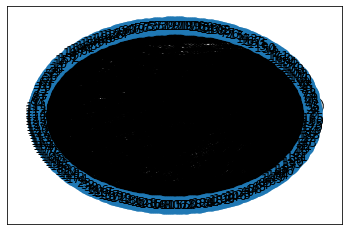

Common Neighbors:
[[188.  21.  29. ...   3.   1.   2.]
 [ 21.  21.  12. ...   1.   0.   1.]
 [ 29.  12.  29. ...   1.   0.   1.]
 ...
 [  3.   1.   1. ...   3.   0.   1.]
 [  1.   0.   0. ...   0.   1.   0.]
 [  2.   1.   1. ...   1.   0.   2.]]
RA:
[[1.13181353e+01 4.63985307e-01 1.13978746e+00 ... 6.87249460e-02
  1.81818182e-02 6.78191489e-02]
 [4.63985307e-01 4.63985307e-01 2.20638518e-01 ... 5.31914894e-03
  0.00000000e+00 5.31914894e-03]
 [1.13978746e+00 2.20638518e-01 1.13978746e+00 ... 5.31914894e-03
  0.00000000e+00 5.31914894e-03]
 ...
 [6.87249460e-02 5.31914894e-03 5.31914894e-03 ... 6.87249460e-02
  0.00000000e+00 5.31914894e-03]
 [1.81818182e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.81818182e-02 0.00000000e+00]
 [6.78191489e-02 5.31914894e-03 5.31914894e-03 ... 5.31914894e-03
  0.00000000e+00 6.78191489e-02]]
Jaccard:
[[ 1.          0.11170213  0.15425532 ...  0.01595745  0.00531915
   0.0106383 ]
 [-1.          1.          0.31578947 ...  0.04347826       

C:\Users\jienb\AppData\Local\Temp/ipykernel_15900/1608504193.py:30: RuntimeWarning: invalid value encountered in true_divide
  sim = sim / ( np.multiply( deg_row_matrix, sim1 ) - sim )


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#--------------------------------------------
def Common_Neighbors( matrix ):
    #计算CN指标
    #matrix-网络的邻接矩阵，sim-相似性矩阵
    sim = np.dot( matrix, matrix )
    return sim
#--------------------------------------------
def RA( matrix ):
    #计算RA指标
    #matrix-网络的邻接矩阵，sim-相似性矩阵
    add_row = matrix.sum( axis = 1 )           #行求和
    add_row_matrix = np.tile( add_row, (( matrix.shape )[0]) )
    sim = adjacent_matrix / add_row_matrix     #节点权重
    sim = matrix * sim
    return sim 
#-------------------------------------------   
def Jaccard( matrix ):
    #计算Jaccard指标
    #matrix-网络的邻接矩阵，sim-相似性矩阵
    sim = matrix * matrix
    sim1 = sim.copy()                          #深复制，sim1与sim指向不同内存
    sim1[ np.nonzero( sim1 ) ] = 1             #分子
    deg_row = matrix.sum( axis = 0 )           #行求和得节点度
    deg_row_matrix = np.tile( deg_row, ( (matrix.shape)[0], 1) )
    deg_row_matrix = np.multiply( deg_row_matrix, sim1 )
    deg_row_matrix = np.triu( deg_row_matrix ) + np.triu( (deg_row_matrix.T) )
    sim = sim / ( np.multiply( deg_row_matrix, sim1 ) - sim )
    return sim
#-------------------------------------------
G = nx.read_adjlist( "Jazz.txt" )        #无向图 
adjacent_matrix = nx.to_numpy_matrix( G )    #邻接矩阵
#--------------------------------------------绘图
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True )
plt.show()
#--------------------------------------------节点相似性
CN_sim = Common_Neighbors( adjacent_matrix )
RA_sim = RA( adjacent_matrix )
Jac_sim = Jaccard( adjacent_matrix )
#--------------------------------------------节点相似性绘图
print( "Common Neighbors:" )
print( CN_sim )
print( "RA:" )
print( RA_sim )
print( "Jaccard:" )
print( Jac_sim )
